In [31]:
import os
import sys

file_dir = os.getcwd()
sys.path.append(file_dir + "/mlrose")

import mlrose.mlrose_hiive as mlrose
from common import state_fitness_callback
import common

import importlib

import mlrose_hiive as mlrose
import numpy as np
import itertools
import time

import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True

RHC_ALGO="Random Hill Climb"
SA_ALGO="Simulated Annealing"
GA_ALGO="Genetic Algorithm"
MIMIC_ALGO="MIMIC Algorithm"

rhc_experiment_name = RHC_ALGO.replace(" ","_")
sa_experiment_name = SA_ALGO.replace(" ","_")
ga_experiment_name = GA_ALGO.replace(" ","_")
mimic_experiment_name = MIMIC_ALGO.replace(" ","_")

PROBLEM = "Continous-Peaks"
output_directory = "{}".format(PROBLEM)


In [32]:
t_pct=0.5

rhc_restarts=20
rhc_max_attempts = 100
rhc_max_iters = 10000

sa_schedule = mlrose.ExpDecay(init_temp=1, exp_const=0.01)
sa_max_attempts = 200
sa_max_iters = 10000

ga_pop_size=50
ga_mutation_prob=0.5
ga_max_attempts=30
ga_max_iters=10000

mimic_pop_size=500
mimic_keep_pct=0.1
mimic_max_attempts=10
mimic_max_iters=10000

In [33]:
rhc_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

sa_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
ga_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}
mimic_problem_size_results = {"problem_size":[], "best_fitness":[], "fitness_curve":[],
                           "max_iterations":[], "call_curve":[], "max_function_calls":[],
                           "time_curve":[], "max_time":[]}

for n in range(10, 110, 10):
    fitness = mlrose.ContinuousPeaks(t_pct=t_pct)
    problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
    init_state = np.random.choice([0, 1], size=(n,))

    print("Running n = {}".format(n))
    print(RHC_ALGO)
    rhc_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    rhc_best_state, rhc_best_fitness, rhc_curve, rhc_call_curve = mlrose.random_hill_climb(problem, restarts=rhc_restarts,
                                                          max_attempts = rhc_max_attempts, max_iters = rhc_max_iters,
                                                          init_state = init_state, curve=True,
                                                        state_fitness_callback=common.state_fitness_callback, callback_user_info=rhc_callback_user_info)
    rhc_problem_size_results["problem_size"].append(n)
    rhc_problem_size_results["best_fitness"].append(rhc_best_fitness)
    
    rhc_problem_size_results["fitness_curve"].append(rhc_curve)
    rhc_problem_size_results["max_iterations"].append(len(rhc_curve))
    
    rhc_problem_size_results["call_curve"].append(rhc_call_curve)
    rhc_problem_size_results["max_function_calls"].append(max(rhc_call_curve))
    
    rhc_problem_size_results["time_curve"].append(rhc_callback_user_info['time_taken'])
    rhc_problem_size_results["max_time"].append(max(rhc_callback_user_info['time_taken']))
                         
    print(SA_ALGO)
    sa_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    sa_best_state, sa_best_fitness, sa_curve, sa_call_curve = mlrose.simulated_annealing(problem, schedule = sa_schedule,
                                                      max_attempts = sa_max_attempts, max_iters = sa_max_iters,
                                                      init_state = init_state, curve=True,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=sa_callback_user_info)
    sa_problem_size_results["problem_size"].append(n)
    sa_problem_size_results["best_fitness"].append(sa_best_fitness)
                                            
    sa_problem_size_results["fitness_curve"].append(sa_curve)
    sa_problem_size_results["max_iterations"].append(max(sa_curve))
    
    sa_problem_size_results["call_curve"].append(sa_call_curve)
    sa_problem_size_results["max_function_calls"].append(max(sa_call_curve))
    
    sa_problem_size_results["time_curve"].append(sa_callback_user_info['time_taken'])
    sa_problem_size_results["max_time"].append(max(sa_callback_user_info['time_taken']))
   
    print(GA_ALGO)
    ga_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    ga_best_state, ga_best_fitness, ga_curve, ga_call_curve = mlrose.genetic_alg(problem, pop_size=ga_pop_size, mutation_prob=ga_mutation_prob,
                                                      max_attempts = ga_max_attempts, max_iters = ga_max_iters, curve=True,
                                                    state_fitness_callback=state_fitness_callback, callback_user_info=ga_callback_user_info)
    ga_problem_size_results["problem_size"].append(n)
    ga_problem_size_results["best_fitness"].append(ga_best_fitness)
                                           
    ga_problem_size_results["fitness_curve"].append(ga_curve)
    ga_problem_size_results["max_iterations"].append(max(ga_curve))

    ga_problem_size_results["call_curve"].append(ga_call_curve)
    ga_problem_size_results["max_function_calls"].append(max(ga_call_curve))

    ga_problem_size_results["time_curve"].append(ga_callback_user_info['time_taken'])
    ga_problem_size_results["max_time"].append(max(ga_callback_user_info['time_taken']))
                
    print(MIMIC_ALGO)
    mimic_callback_user_info = {'timer': common.timer(), 'time_taken': []}
    mimic_best_state, mimic_best_fitness, mimic_curve, mimic_call_curve =\
    mlrose.mimic(problem, pop_size=mimic_pop_size, keep_pct=mimic_keep_pct, max_attempts = mimic_max_attempts, max_iters = mimic_max_iters, curve=True,
                state_fitness_callback=state_fitness_callback, callback_user_info=mimic_callback_user_info)
    mimic_problem_size_results["problem_size"].append(n)
    mimic_problem_size_results["best_fitness"].append(mimic_best_fitness)
                                           
    mimic_problem_size_results["fitness_curve"].append(mimic_curve)
    mimic_problem_size_results["max_iterations"].append(max(mimic_curve))

    mimic_problem_size_results["call_curve"].append(mimic_call_curve)
    mimic_problem_size_results["max_function_calls"].append(max(mimic_call_curve))

    mimic_problem_size_results["time_curve"].append(mimic_callback_user_info['time_taken'])
    mimic_problem_size_results["max_time"].append(max(mimic_callback_user_info['time_taken']))

Running n = 10
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 20
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 30
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 40
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 50
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 60
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 70
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 80
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 90
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm
Running n = 100
Random Hill Climb
Simulated Annealing
Genetic Algorithm
MIMIC Algorithm


Random Hill Climb best fitness [10.0, 20.0, 30.0, 40.0, 50.0, 47.0, 70.0, 33.0, 51.0, 82.0]
Simulated Annealing best fitness [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]
Genetic Algorithm best fitness [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 77.0, 92.0]
MIMIC Algorithm best fitness [10.0, 20.0, 30.0, 34.0, 40.0, 37.0, 48.0, 38.0, 31.0, 37.0]


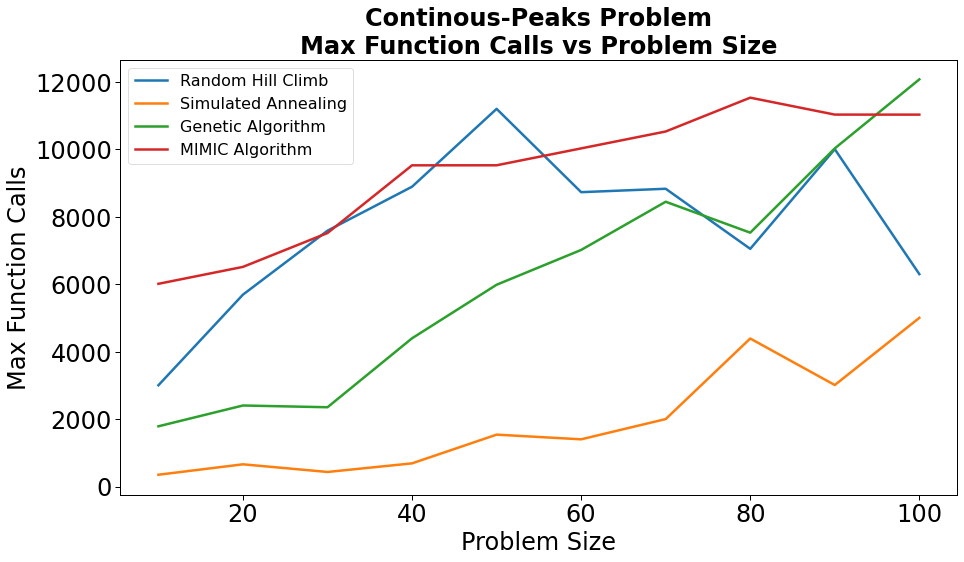

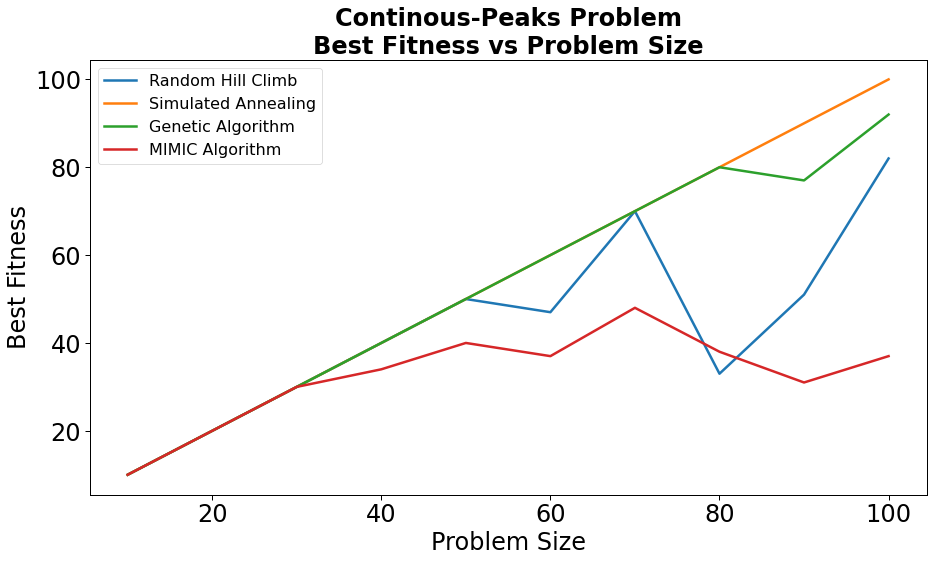

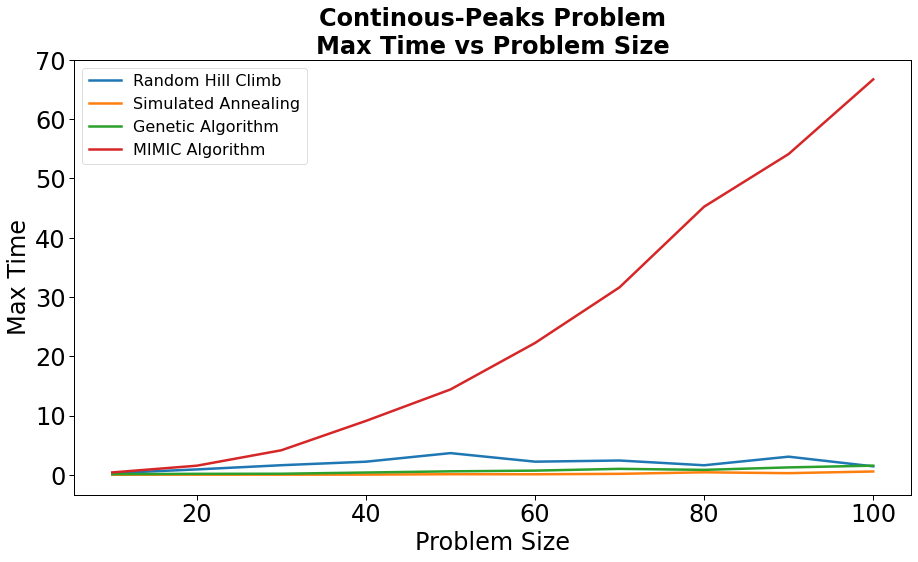

In [34]:
importlib.reload(common)

labels = [RHC_ALGO, SA_ALGO, GA_ALGO, MIMIC_ALGO]
results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]
all_fitness = [r['best_fitness'] for r in results]

for f,l in zip(all_fitness, labels):
    print("{} best fitness {}".format(l,f))

max_fitness = np.max(np.array(all_fitness), axis=0)
rhc_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(rhc_problem_size_results["best_fitness"], max_fitness)]
sa_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(sa_problem_size_results["best_fitness"], max_fitness)]
ga_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(ga_problem_size_results["best_fitness"], max_fitness)]
mimic_problem_size_results['fitness_ratio'] = [i / j for i, j in zip(mimic_problem_size_results["best_fitness"], max_fitness)]

results = [rhc_problem_size_results, sa_problem_size_results, ga_problem_size_results, mimic_problem_size_results]

common.plot_vs_problem_size(results, labels, PROBLEM, y="max_function_calls")

common.plot_vs_problem_size(results, labels, PROBLEM, y="best_fitness")

common.plot_vs_problem_size(results, labels, PROBLEM, y="max_time")

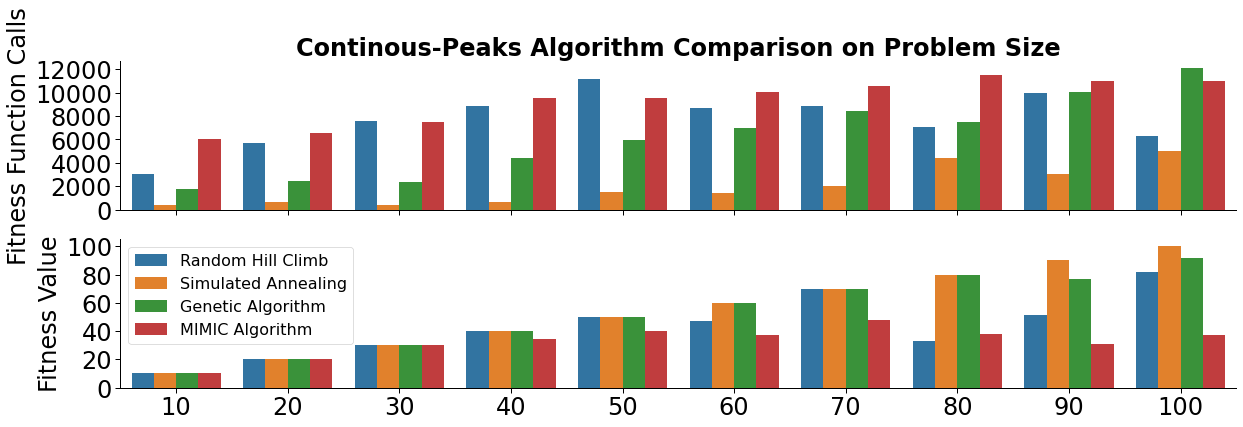

In [40]:
importlib.reload(common)
common.plot_vs_problem_size_both(results, labels, PROBLEM)

Random Hill Climb best fitness = 51.0
Simulated Annealing best fitness = 90.0
Genetic Algorithm best fitness = 77.0
MIMIC Algorithm best fitness = 31.0

Random Hill Climb  Max Iterations =   =  9771  Max  fitness_curve  =  51.0
Simulated Annealing  Max Iterations =   =  2303  Max  fitness_curve  =  90.0
Genetic Algorithm  Max Iterations =   =  195  Max  fitness_curve  =  77.0
MIMIC Algorithm  Max Iterations =   =  21  Max  fitness_curve  =  31.0
Random Hill Climb  max  time_curve  =  3.0588254928588867  max  fitness_curve  =  51.0
Simulated Annealing  max  time_curve  =  0.27884650230407715  max  fitness_curve  =  90.0
Genetic Algorithm  max  time_curve  =  1.2487971782684326  max  fitness_curve  =  77.0
MIMIC Algorithm  max  time_curve  =  54.119184494018555  max  fitness_curve  =  31.0


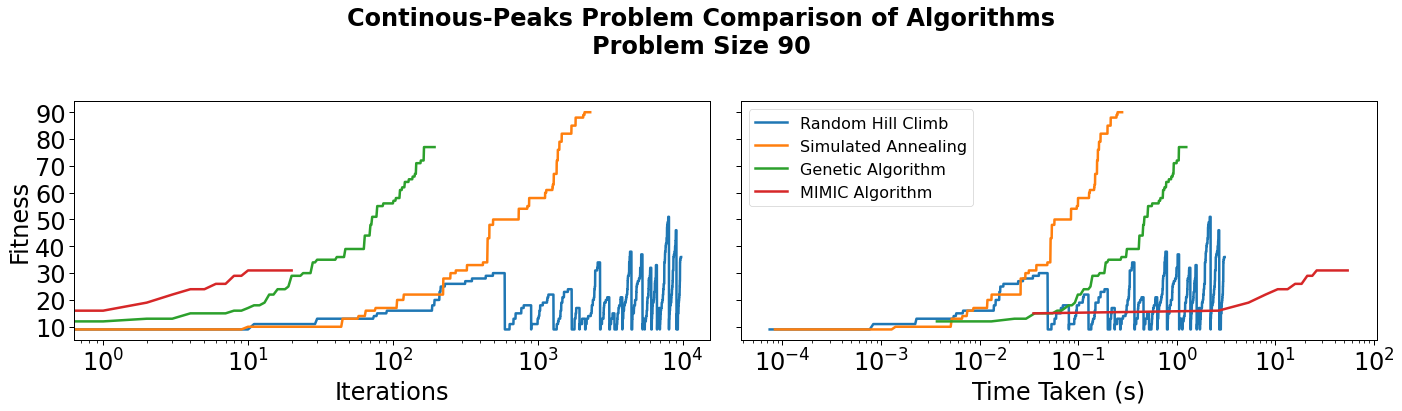

Random Hill Climb  max  time_curve  =  3.0588254928588867  max  fitness_curve  =  51.0
Simulated Annealing  max  time_curve  =  0.27884650230407715  max  fitness_curve  =  90.0
Genetic Algorithm  max  time_curve  =  1.2487971782684326  max  fitness_curve  =  77.0
MIMIC Algorithm  max  time_curve  =  54.119184494018555  max  fitness_curve  =  31.0


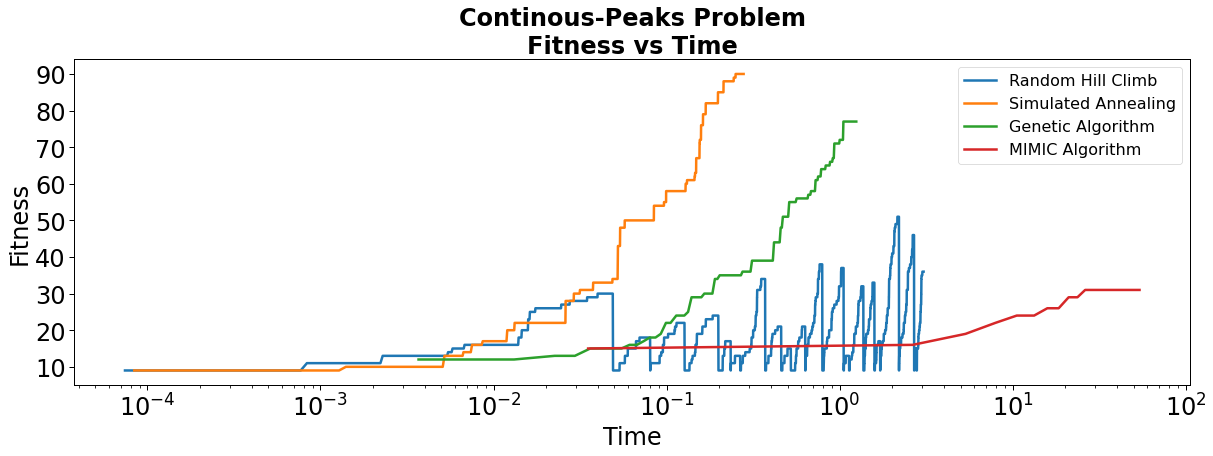

In [38]:
importlib.reload(common)
problem_size = 90
for r,l in zip(results, labels):
    index = r["problem_size"].index(problem_size)
    print("{} best fitness = {}".format(l, r["best_fitness"][index]))

print()
common.plot_for_problem_size_all(results, labels, PROBLEM, problem_size=problem_size, log_x=True)

common.plot_for_problem_size(results, labels, PROBLEM, x="time_curve", y="fitness_curve", problem_size=problem_size, log_x=True)



In [8]:
# Main Problem Creation

n = 90

fitness = mlrose.ContinuousPeaks(t_pct=t_pct)
problem = mlrose.DiscreteOpt(length=n, fitness_fn=fitness, maximize=True, max_val=2)
init_state = np.random.choice([0, 1], size=(n,))

In [23]:
rhc = mlrose.RHCRunner(problem=problem,
                       experiment_name=rhc_experiment_name,
                       output_directoyr=output_directory,
                       seed=2,
                       iteration_list=[rhc_max_iters],
                       restart_list=[i for i in range(1, 100, 20)],
                       max_attempts=rhc_max_attempts)
rhc_run_stats, rhc_curves = rhc.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[1], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[10.0000]
	[0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1// 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0// 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1...

restarts:[1], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[0]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[185], done:[True], time:[0.03], fitness:[22.0000]
	[0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1// 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0// 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...

restarts:[1], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restar

runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.43], fitness:[6.0000]
	[1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[21], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[406], done:[True], time:[0.54], fitness:[32.0000]
	[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[21], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[9]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.54], fitness:[6.0000]
	[1 1 1 1 1 1 0 0 1 

restarts:[21], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[18]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[580], done:[True], time:[1.39], fitness:[26.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1// 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1...

restarts:[21], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.40], fitness:[8.0000]
	[0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0// 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0...

restarts:[21], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[7]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[543], done:[True], time:[0.54], fitness:[29.0000]
	[1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.56], fitness:[6.0000]
	[1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], at

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[18]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[580], done:[True], time:[1.69], fitness:[26.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1// 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.71], fitness:[8.0000]
	[0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0// 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[290], done:[True], time:[3.52], fitness:[10.0000]
	[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1// 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1// 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.54], fitness:[5.0000]
	[1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1// 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0// 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[616], done:[True], time:[6.96], fitness:[50.0000]
	[1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1// 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[40]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[7.00], fitness:[6.0000]
	[0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1// 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0// 1 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1...

restarts:[41], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[40]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[0.91], fitness:[6.0000]
	[1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[406], done:[True], time:[1.04], fitness:[32.0000]
	[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[9]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], at

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[18]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[580], done:[True], time:[2.47], fitness:[26.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1// 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[2.51], fitness:[8.0000]
	[0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0// 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[290], done:[True], time:[4.81], fitness:[10.0000]
	[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1// 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1// 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[4.86], fitness:[5.0000]
	[1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1// 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0// 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[8.28], fitness:[9.0000]
	[1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1// 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0// 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[616], done:[True], time:[8.77], fitness:[50.0000]
	[1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1// 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[40]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[620], done:[True], time:[13.80], fitness:[29.0000]
	[0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1// 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[50]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[13.86], fitness:[6.0000]
	[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0// 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1// 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[50]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[712], done:[True], time:[18.55], fitness:[30.0000]
	[0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1// 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[60]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[18.62], fitness:[6.0000]
	[0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1// 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1// 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1...

restarts:[61], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[60]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[7]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[543], done:[True], time:[1.35], fitness:[29.0000]
	[1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1// 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[1.42], fitness:[6.0000]
	[1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0// 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0// 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[8]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], at

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[18]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[580], done:[True], time:[3.58], fitness:[26.0000]
	[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1// 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[3.65], fitness:[8.0000]
	[0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0// 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 0// 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[19]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[28]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[290], done:[True], time:[6.40], fitness:[10.0000]
	[0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1// 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1// 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[6.47], fitness:[5.0000]
	[1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1// 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0// 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[29]
runner_name:[rhc], experiment_name:[Random_Hill_Climb],

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[38]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[110], done:[True], time:[10.28], fitness:[8.0000]
	[0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0// 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1// 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[10.37], fitness:[9.0000]
	[1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1// 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0// 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[39]
runner_name:[rhc], experiment_name:[Random_Hill_Climb]

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[48]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[176], done:[True], time:[15.46], fitness:[15.0000]
	[0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0// 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1// 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[15.55], fitness:[7.0000]
	[0 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1// 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[49]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[58]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[457], done:[True], time:[20.29], fitness:[26.0000]
	[1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0// 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[20.38], fitness:[9.0000]
	[0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1// 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1// 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[59]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[68]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[225], done:[True], time:[26.61], fitness:[13.0000]
	[0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1// 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1// 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[69]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[26.71], fitness:[5.0000]
	[1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1// 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1// 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[69]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[78]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[101], iteration:[487], done:[True], time:[32.56], fitness:[34.0000]
	[1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1// 0 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[79]
runner_name:[rhc], experiment_name:[Random_Hill_Climb], attempt:[0], iteration:[0], done:[False], time:[32.70], fitness:[5.0000]
	[0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0// 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1// 1 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1...

restarts:[81], max_iters:[10000], output_directoyr:[Continous-Peaks], current_restart:[79]
runner_name:[rhc], experiment_name:[Random_Hill_Climb

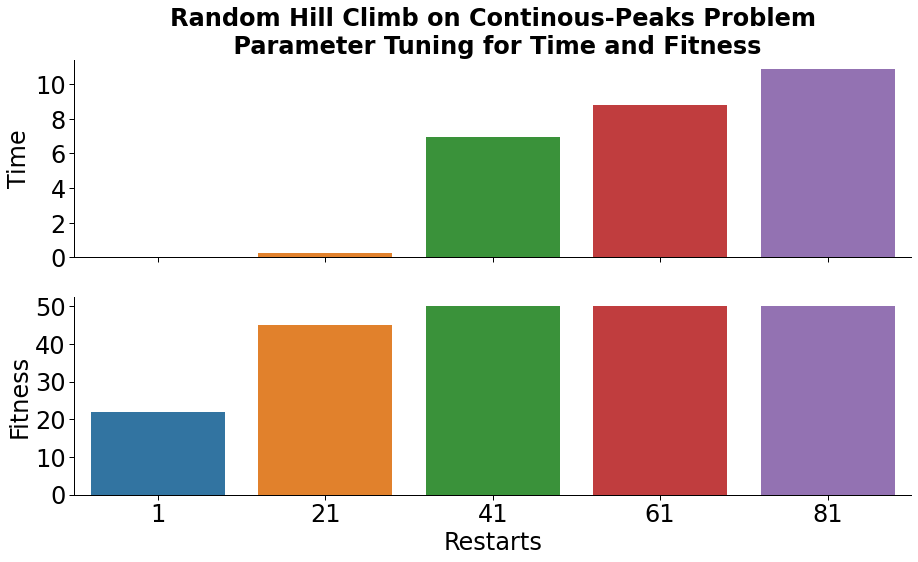

In [24]:
importlib.reload(common)

best_rhc_run_stats = common.get_best_runs_from_runner(rhc_run_stats, ['Restarts'])
common.plot_runner_results_both_1param(best_rhc_run_stats, RHC_ALGO, PROBLEM, param1='Restarts')


In [11]:
decay_list = [0.001, 0.01, 0.05, 0.1]
sa = mlrose.SARunner(problem=problem,
              experiment_name=sa_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[sa_max_iters],
              max_attempts=sa_max_attempts,
              decay_list = decay_list,
              temperature_list=[1, 10, 50, 100, 500])

sa_run_stats, sa_curves = sa.run()

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

schedule:[1], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[201], iteration:[2467], done:[True], time:[0.37], fitness:[90.0000]
	[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[F

schedule:[50], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[201], iteration:[5592], done:[True], time:[1.11], fitness:[90.0000]
	[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0// 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[50], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

schedule:[50], max_iters:[10000]
runner_name:[sa], experiment_name:[Simulated_Annealing], attempt:[201], iteration:[2317], done:[True], time:[0.47], fitness:[90.0000]
	[0 0 0 0 0 0 0 0 0 

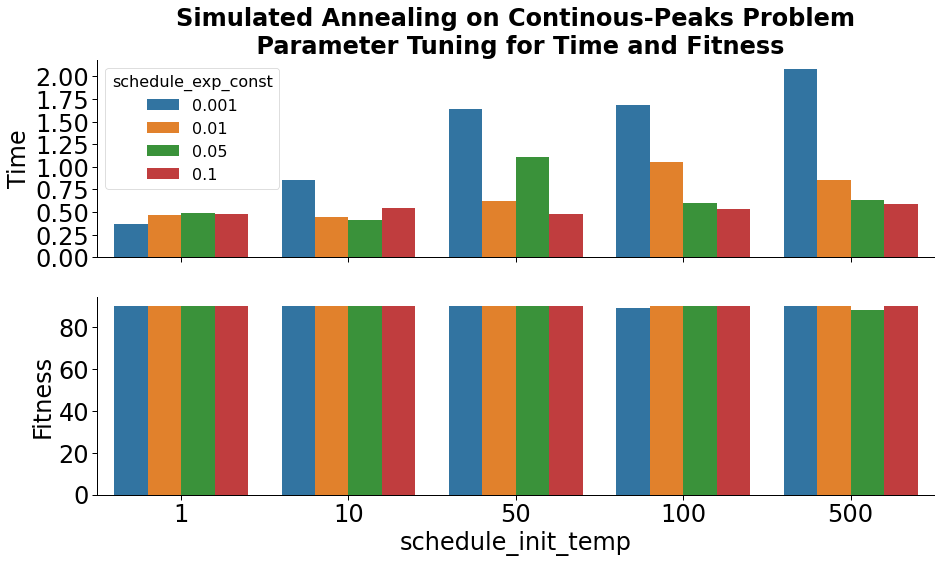

In [12]:
importlib.reload(common)
best_sa_run_stats = common.get_best_runs_from_runner(sa_run_stats, ['schedule_init_temp', 'schedule_exp_const'])
common.plot_runner_results_both(best_sa_run_stats, SA_ALGO, PROBLEM, param1='schedule_init_temp', param2='schedule_exp_const')

In [13]:
ga = mlrose.GARunner(problem=problem,
              experiment_name=ga_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[ga_max_iters],
              max_attempts=ga_max_attempts,
              population_sizes=[10, 50, 100, 500, 1000],
              mutation_rates=[0.01, 0.05, 0.1, 0.5])

ga_run_stats, ga_curves = ga.run()

Running ga
*****************
*** Run START ***
*****************
pop_size:[10], mutation_prob:[0.01], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

pop_size:[10], mutation_prob:[0.01], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[31], iteration:[34], done:[True], time:[0.05], fitness:[13.0000]
	[1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0// 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1// 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[10], mutation_prob:[0.05], max_iters:[10000]
runner_name:[ga], experiment_n

pop_size:[100], mutation_prob:[0.1], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[31], iteration:[112], done:[True], time:[1.44], fitness:[49.0000]
	[0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1// 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0// 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1]...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[100], mutation_prob:[0.5], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

pop_size:[100], mutation_prob:[0.5], max_iters:[10000]
runner_name:[ga], experiment_name:[Genetic_Algorithm], attempt:[31], iteration:[187], done:[Tr

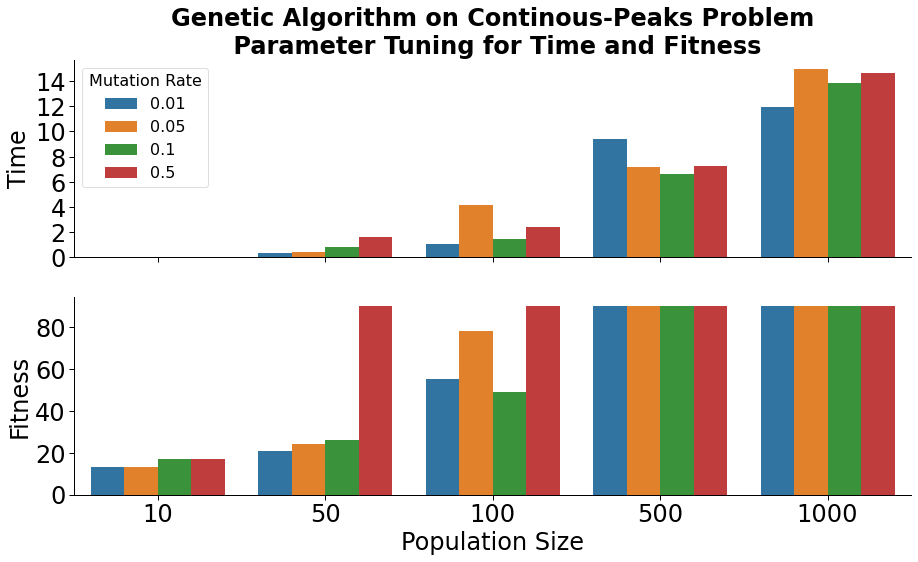

In [14]:
importlib.reload(common)

best_ga_run_stats = common.get_best_runs_from_runner(ga_run_stats, ['Population Size','Mutation Rate'])
common.plot_runner_results_both(best_ga_run_stats, GA_ALGO, PROBLEM, param1='Population Size', param2='Mutation Rate')

In [15]:
mimic = mlrose.MIMICRunner(problem=problem,
              experiment_name=mimic_experiment_name,
              output_directory=output_directory,
              seed=1,
              iteration_list=[mimic_max_iters],
              max_attempts=mimic_max_attempts,
              population_sizes=[100, 500, 1000, 5000, 10000],
              keep_percent_list=[0.01, 0.05, 0.1, 0.2, 0.5])

mimic_run_stats, mimic_curves = mimic.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[100], keep_pct:[0.01], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[100], keep_pct:[0.01], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[11], done:[True], time:[28.49], fitness:[11.0000]
	[0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.// 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.// 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], 

use_fast_mimic:[False], pop_size:[500], keep_pct:[0.5], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[43], done:[True], time:[117.44], fitness:[38.0000]
	[0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.// 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.// 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[1000], keep_pct:[0.01], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.06], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[1000], keep_pct:[0.01], max_iters:[10000]
runner_name:[mi

use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.5], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[0], iteration:[0], done:[False], time:[0.34], fitness:[6.0000]
	[1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1// 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0// 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 1]...

use_fast_mimic:[False], pop_size:[5000], keep_pct:[0.5], max_iters:[10000]
runner_name:[mimic], experiment_name:[MIMIC_Algorithm], attempt:[11], iteration:[40], done:[True], time:[153.26], fitness:[90.0000]
	[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.// 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[False], pop_size:[10000], keep_pct:[0.01], max_iters:[10000]
runner_name:[m

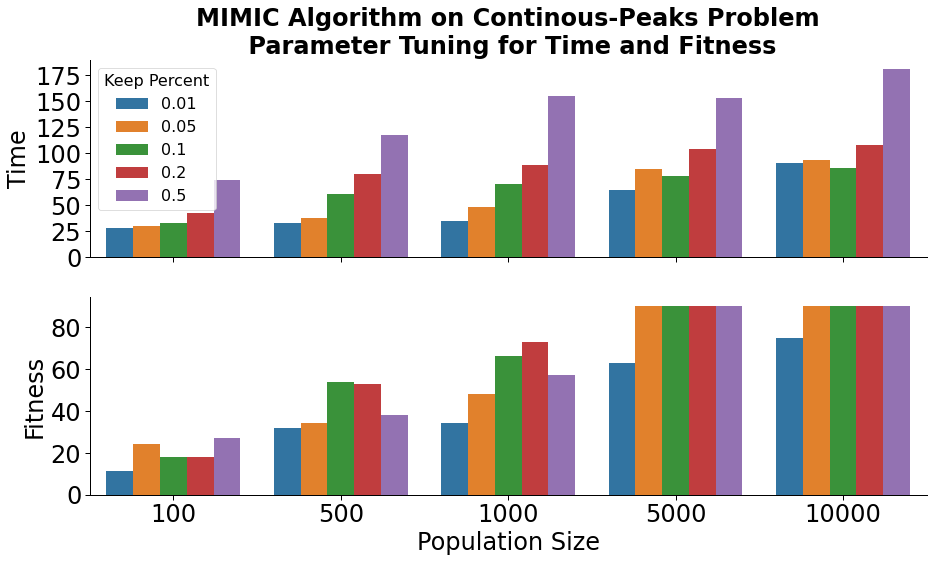

In [16]:
best_mimic_run_stats = common.get_best_runs_from_runner(mimic_run_stats, ['Population Size','Keep Percent'])
common.plot_runner_results_both(best_mimic_run_stats, MIMIC_ALGO, PROBLEM, param1='Population Size', param2='Keep Percent', legend_loc="upper left")